In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cv2
from scipy.integrate import quad

In [2]:
np.warnings.filterwarnings('ignore')

In [7]:
img = cv2.imread("./img/amphora1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

interactive(children=(IntSlider(value=1754, description='center', max=3508), IntSlider(value=1241, description…

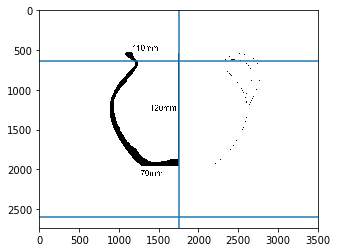

In [9]:
from ipywidgets import interact

def update(center, top, bottom):
    plt.imshow(img, cmap="gray")
    plt.axvline(x=center)
    plt.axhline(y=top)
    plt.axhline(y=bottom)
        
    def f(y):
        # Calculates the section area at level y
        y = int(y)
        first_black_pixel = img[y,:].argmin() # get first black pixel
        radius = first_black_pixel - center
        section_area = np.pi*radius**2
        return section_area
    vol = round(quad(f,top, bottom)[0]*1e-6,3)
    
    print("Volume:", vol)
    
    

interact(update, center = (0,img.shape[1]), top = (0,img.shape[0]), bottom = (0,img.shape[1]));